In [1]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
from math import pi




In [17]:
def get_se_npr2017(s,T,eta = 1):
    if T <= s['TB']:
        Se = s['agS'] * (1+(T/s['TB'])*(eta*s['p']-1))
    elif s['TB'] <= T <= s['TC']:
        Se = s['agS']*eta*s['p']
    elif s['TC'] <= T <= s['TD']:
        Se = s['agS']*eta*s['p'] * (s['TC']/ T)
    else:
        Se = s['agS']*eta*s['p'] * (s['TC']*s['TD']/ T**2)
    return Se

def get_se(spectrum,T,eta = 1):
    se = get_se_npr2017(spectrum,T,eta)
    '''
    if spectrum['code'] == 'NPR2017':
        se = get_se_npr2017(spectrum,T,eta)
    else:
        se = 0
    '''
    return se

In [18]:
# readin in excel values
spectrum = {'code': 'NPR2017',
            'agS': 0.2804,
            'p': 1.627,
            'TB': 0.201,
            'TC': 0.629,
            'TD': 1.113
           }
#df_m['node'] = np.vectorize(Node.parse_xyz)(df_m['x'],df_m['y'],df_m['z'])


def get_string(s1,s2):
    return str(s1) + ' ' + str(s2)

def get_spectrum(spectrum,g = 9.81):
    dfs = pd.DataFrame()
    np_T = np.arange(0,2,0.001) 
    np_Se = np.vectorize(get_se)(spectrum,np_T)
    np_Su = np_Se * g * np_T**2  / (2*pi)**2 * 10**3
    dfs['T'] =  np_T
    dfs['Se'] = np_Se
    dfs['Su'] = np_Su
    dfs['T_Se'] = np.vectorize(get_string)(np_T,np_Se)
    return dfs

spectrum['data'] = get_spectrum(spectrum)
print(spectrum['data']['Se'].max())
#print(' '.join(spectrum['data']['T_Se'].tolist()))
print('done')

0.45621079999999997
done


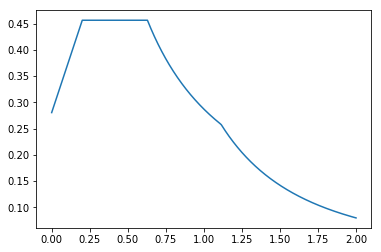

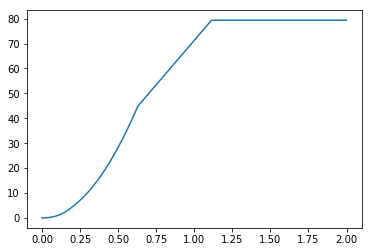

In [26]:
folder = r'D:\Data\Python\Project_database'
plt.figure(1)
T_Se = plt.plot(spectrum['data']['T'],spectrum['data']['Se'])
plt.savefig(folder + r'\acceleration_spectrum.png',format = 'png')
plt.figure(2)
T_Su = plt.plot(spectrum['data']['T'],spectrum['data']['Su'])
plt.savefig(folder + r'\displacement_spectrum.png',format = 'png')

In [ ]:
T_Se = plt.plot(dfs['T'],dfs['Su'])
plt.show()

In [ ]:
T_Se = plt.plot(dfs['Su'],dfs['Se'])
plt.show()

In [ ]:
import math as m
import numpy as np
import matplotlib.pyplot as plt


class Spectrum2017:

    def __init__(self, PGA, p, Tb, Tc, Td, Tup):
        self.PGA = PGA          # Peak ground acceleration at ground (a_g.S)
        self.p = p
        self.Tb = Tb
        self.Tc = Tc
        self.Td = Td
        self.Tup = Tup           # Upper limit of Period for spectra

    def HorzSpectra(self, T):
        self.T = T
        if self.T <= self.Tb:
            Se = self.PGA * (1.0+(self.T/self.Tb)*(1.0*self.p-1.0))
            Sd = Se * (self.T/(2.0*m.pi))**2.0 * 9.81

        elif self.T <= self.Tc:
            Se = self.PGA * 1.0 * self.p
            Sd = Se * (self.T/(2.0*m.pi))**2.0 * 9.81

        elif self.T <= self.Td:
            Se = self.PGA * 1.0 * self.p * (self.Tc/self.T)
            Sd = Se * (self.T/(2.0*m.pi))**2.0 * 9.81

        elif self.T <= 4.0:
            Se = self.PGA * 1.0 * self.p * (self.Tc*self.Td/self.T/self.T)
            Sd = Se * (self.T/(2.0*m.pi))**2.0 * 9.81

        else:
            Se = self.PGA * 1.0 * self.p * (self.Tc*self.Td/self.T/self.T)
            Sd = Se * (self.T/(2.0*m.pi))**2.0 * 9.81

        return {'Se': Se, 'Sd': Sd, }


class Spectrum2015:

    def __init__(self, ag_ref, kag, Gamma_m, Tup):
        self.ag_ref = ag_ref          # Peak ground acceleration at ground (a_g)
        self.kag = kag
        self.Gamma_m = Gamma_m
        self.Tup = Tup           # Upper limit of Period for spectra

    def HorzSpectra(self, T):
        self.T = T
        Ss = 2.2 * self.ag_ref * self.kag
        S1 = 0.654 * self.ag_ref * self.kag
        Fa = -0.5 * m.log(self.ag_ref * self.kag) + 0.65
        Fv = -0.87 * self.ag_ref * self.kag + 2.44
        Sms = Fa * Ss * self.Gamma_m
        Sm1 = Fv * S1 * self.Gamma_m
        n = 1.0
        Tc = m.sqrt(Sm1/Sms)
        Tb = 0.2 * Tc
        
        if self.T == 0:
            Se = Sms/3
            Sd = Se * (self.T/(2.0*m.pi))**2.0 * 9.81
            
        if self.T <= Tb:
            Se = Sms/3 * (1 + (self.T/Tb) * (n * 3 - 1))
            Sd = Se * (self.T/(2.0*m.pi))**2.0 * 9.81

        elif self.T <= Tc:
            Se = Sms * n
            Sd = Se * (self.T/(2.0*m.pi))**2.0 * 9.81

        else:
            Se = (Sm1 / self.T**2) * n
            Sd = Se * (self.T/(2.0*m.pi))**2.0 * 9.81

        return {'Se': Se, 'Sd': Sd, 'Tb': Tb, 'Tc': Tc}
    


spectrum = NPR2017_SPECTRA(PGA =  0.2804,
                           p =  1.627,
                           Tb =  0.201,
                           Tc =  0.629,
                           Td =  1.113,
                           Tup = 2)

spectrum_res = 


In [ ]:
spectrum_res